In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import sys
import pandas as pd
import pickle

root_path = os.environ['FCLA_ROOT']
data_path = os.environ['DATA_PATH']
sys.path.append(os.path.join(root_path,'scripts'))

from mergeResults import *
sns.set(style="whitegrid")

In [74]:
def plot_all(dirname,expname,gurobi=False, fcla=False, log=True):
    if (gurobi):
        results15 = load_results(os.path.join(data_path, "real", dirname, "solutions", "gurobi"), 
                           os.path.join(data_path,'real',dirname))
    if (fcla):
        results15_fcla = load_results(os.path.join(data_path, "real", dirname, "solutions", "fcla"), 
                                   os.path.join(data_path,'real',dirname))
    results15_fcla_l0 = load_results(os.path.join(data_path, "real", dirname, "solutions", "fcla_l0"), 
                               os.path.join(data_path,'real',dirname))
    results15_hilbert = load_results(os.path.join(data_path, "real", dirname, "solutions", "hilbert"), 
                               os.path.join(data_path,'real',dirname))
    results15_fcla_l0 = results15_fcla_l0[results15_fcla_l0["number of facilities"] > 100]
    results15_hilbert = results15_hilbert[results15_hilbert["number of facilities"] > 100]
    
    fig, (ax1, ax2) = plt.subplots(2,figsize=(6, 6), dpi=300)
    ax1.set_yscale("log", nonposx='clip')
    if (log):
        ax1.set_xscale("log", nonposx='clip', basex=2)
    if (fcla):
        results15_fcla = results15_fcla.sort_values(by='number of facilities')
    if (gurobi):
        results15 = results15.sort_values(by='number of facilities')
    results15_fcla_l0 = results15_fcla_l0.sort_values(by='number of facilities')
    results15_hilbert = results15_hilbert.sort_values(by='number of facilities')
    if (fcla):
        ax1.plot(results15_fcla['number of facilities'],results15_fcla['runtime'], 'k.-', label="WMA BF")
    if (gurobi):
        ax1.plot(results15['number of facilities'],results15['runtime'], 'g^--', label="Gurobi")
    ax1.plot(results15_fcla_l0['number of facilities'],results15_fcla_l0['runtime'], 'ro:',label="WMA")
    ax1.plot(results15_hilbert['number of facilities'],results15_hilbert['runtime'], 'bs-',label="Hilbert")
    ax1.set_ylabel("Runtime [Sec]")
#     plt.title(expname)
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
              ncol=3, mode="expand", borderaxespad=0.)
    plt.setp(ax1.get_xticklabels(), visible=False)
    
#     fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
#     ax2.set_yscale("log", nonposx='clip')
    if (log):
        ax2.set_xscale("log", nonposx='clip', basex=2)
    if (fcla):
        results15_fcla = results15_fcla.sort_values(by='number of facilities')
    if (gurobi):
        results15 = results15.sort_values(by='number of facilities')
    results15_fcla_l0 = results15_fcla_l0.sort_values(by='number of facilities')
    results15_hilbert = results15_hilbert.sort_values(by='number of facilities')
    if (fcla):
        ax2.plot(results15_fcla['number of facilities'],results15_fcla['objective'], 'k.-',label="WMA BF")
    if (gurobi):
        ax2.plot(results15['number of facilities'],results15['objective'], 'g^--',label="Gurobi")
    ax2.plot(results15_fcla_l0['number of facilities'],results15_fcla_l0['objective'], 'ro:',label="WMA")
    ax2.plot(results15_hilbert['number of facilities'],results15_hilbert['objective'], 'bs-',label="Hilbert")
    ax2.set_xlabel("Number of facilities")
    ax2.set_ylabel("Objective")
    if (not log):
        ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#     ax2.ticklabel_format(style='sci', axis='y')

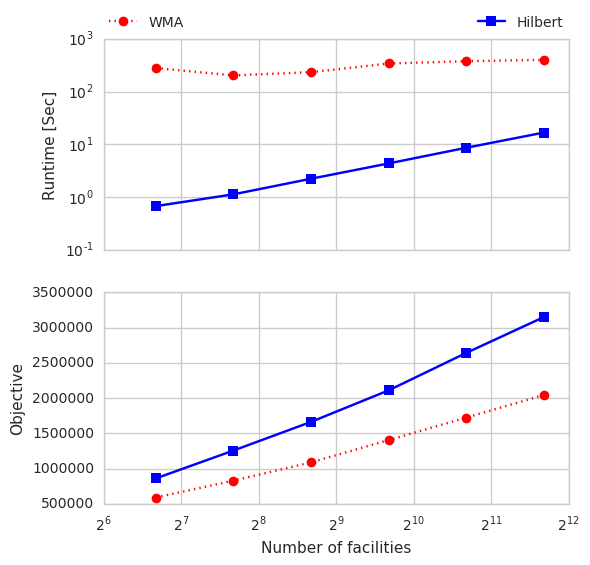

In [75]:
plot_all('pure_aalborg',"5% Cust, 0.5% Fac, capacity=20, 40 clusters, dens 1.5",False,False,log=True)

/home/alogins/.local/lib/python3.4/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


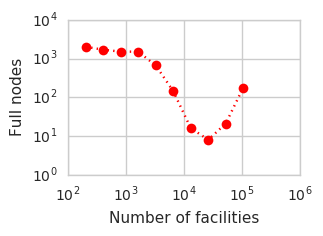

In [43]:
results15_fcla_l0 = load_results(os.path.join(data_path, "real", 'aalborg',
                                              "solutions", "fcla_l0"), 
                               os.path.join(data_path,'real','aalborg'))
fig, ax1 = plt.subplots(figsize=(3, 2), dpi=300)
ax1.set_yscale("log", nonposx='clip')
ax1.set_xscale("log", nonposx='clip')
sortby="number of facilities"
results15_fcla_l0 = results15_fcla_l0.sort_values(by=sortby)
ax1.plot(results15_fcla_l0[sortby],results15_fcla_l0['fullfac'], 'ro:',label="WMA")

ax1.set_ylabel("Full nodes")
ax1.set_xlabel("Number of facilities")

/home/alogins/.local/lib/python3.4/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


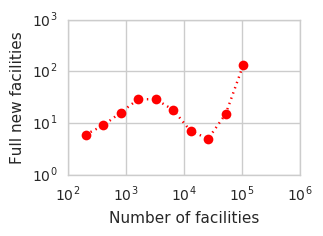

In [44]:
results15_fcla_l0 = load_results(os.path.join(data_path, "real", 'aalborg',
                                              "solutions", "fcla_l0"), 
                               os.path.join(data_path,'real','aalborg'))
fig, ax1 = plt.subplots(figsize=(3, 2), dpi=300)
ax1.set_yscale("log", nonposx='clip')
ax1.set_xscale("log", nonposx='clip')
sortby="number of facilities"
results15_fcla_l0 = results15_fcla_l0.sort_values(by=sortby)
ax1.plot(results15_fcla_l0[sortby],results15_fcla_l0['full facilities'], 'ro:',label="WMA")
ax1.set_ylabel("Full new facilities")
ax1.set_xlabel("Number of facilities")

/home/alogins/.local/lib/python3.4/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


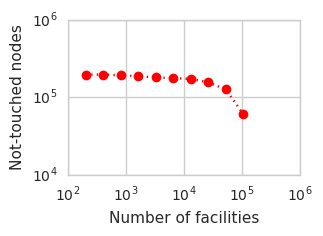

In [45]:
results15_fcla_l0 = load_results(os.path.join(data_path, "real", 'aalborg',
                                              "solutions", "fcla_l0"), 
                               os.path.join(data_path,'real','aalborg'))
fig, ax1 = plt.subplots(figsize=(3, 2), dpi=300)
ax1.set_yscale("log", nonposx='clip')
ax1.set_xscale("log", nonposx='clip')
sortby="number of facilities"
results15_fcla_l0 = results15_fcla_l0.sort_values(by=sortby)
ax1.plot(results15_fcla_l0[sortby],results15_fcla_l0['nullfac'], 'ro:',label="WMA")
ax1.set_ylabel("Not-touched nodes")
ax1.set_xlabel("Number of facilities")

/home/alogins/.local/lib/python3.4/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


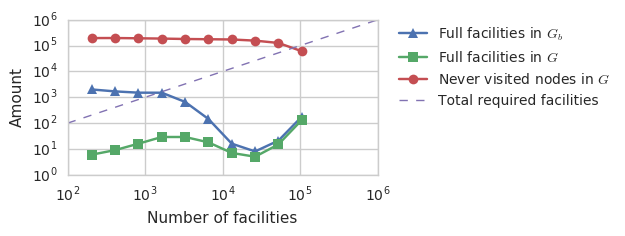

In [76]:
results15_fcla_l0 = load_results(os.path.join(data_path, "real", 'aalborg',
                                              "solutions", "fcla_l0"), 
                               os.path.join(data_path,'real','aalborg'))
fig, ax1 = plt.subplots(figsize=(4, 2), dpi=300)
ax1.set_yscale("log", nonposx='clip')
ax1.set_xscale("log", nonposx='clip')
sortby="number of facilities"
results15_fcla_l0 = results15_fcla_l0.sort_values(by=sortby)
ax1.plot(results15_fcla_l0[sortby],results15_fcla_l0['fullfac'], '^-',label="Full facilities in $G_b$")
ax1.plot(results15_fcla_l0[sortby],results15_fcla_l0['full facilities'], 's-',label="Full facilities in $G$")
ax1.plot(results15_fcla_l0[sortby],results15_fcla_l0['nullfac'], 'o-',label="Never visited nodes in $G$")
ax1.plot([10**2, 10**6], [10**2, 10**6], '--', linewidth=1, label="Total required facilities")
ax1.set_ylabel("Amount")
ax1.set_xlabel("Number of facilities")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)